这个例子展示使用seq label数据的处理过程。  
另外：https://www.jianshu.com/p/e5adb235399e

In [1]:
from torchtext import data
from torchtext import datasets

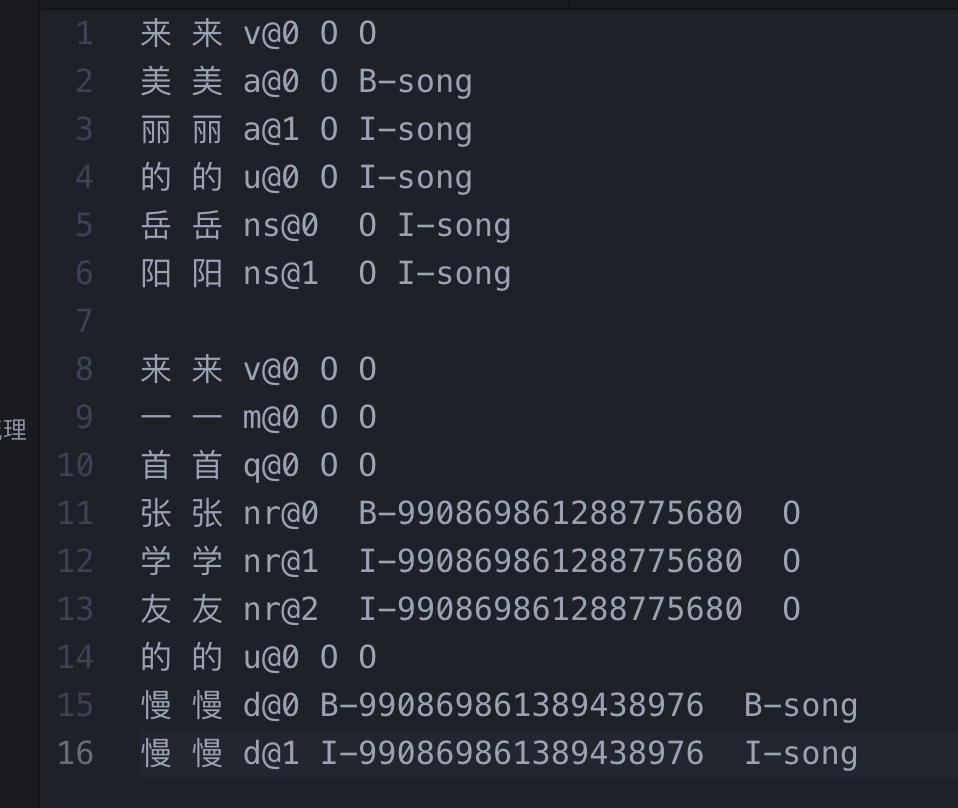

In [2]:
from IPython.display import Image
Image(filename='./images/seq_data.png')
# tab分割

In [4]:
WORD = data.Field(batch_first=True)
ENTITY = data.Field(batch_first=True)
TAG = data.Field(batch_first=True)

# Load the specified data.
train = datasets.SequenceTaggingDataset(
    fields=[('word', WORD), (None, None), (None, None), ('entity', ENTITY), ('tag', TAG)],
    path="./data/seq.txt")

print(vars(train[0]))
print(vars(train[1]))

# 这里可以添加外部词向量
WORD.build_vocab(train.word)
ENTITY.build_vocab(train.entity)
TAG.build_vocab(train.tag)

print(len(WORD.vocab))
print(len(ENTITY.vocab))
print(len(TAG.vocab))

train_iter = data.BucketIterator(train, batch_size=6, device='cpu')
batch = next(iter(train_iter))
print("words", batch.word)
print("entity", batch.entity)
print("tag", batch.tag)

#构造与tag相对应mask tensor
# for batch in iter(train_iter):
#     i = i + 1
#     sentences, entity, tags = batch.word, batch.entity, batch.tag
#     batch_size = len(sentences)
#     max_seq_len = len(sentences[0])
#     mask_tensor = autograd.Variable(torch.zeros((batch_size, max_seq_len))).byte()
#     for idx, tag in enumerate(tags):
#         # print(tag)
#         res = [1 if item != 1 else 0 for item in tag]
#         # print(res)
#         mask_tensor[idx, :max_seq_len] = torch.FloatTensor(res)

{'word': ['你', '唱', '歌', '给', '我', '一', '点'], 'entity': ['O', 'O', 'O', 'O', 'O', 'O', 'O'], 'tag': ['O', 'O', 'O', 'O', 'O', 'O', 'O']}
{'word': ['你', '不', '是', '真', '正', '的', '快', '乐', '邓', '紫', '棋', '2014', '我', '是', '歌', '手', '第', '二', '季'], 'entity': ['B-990869861389438976', 'I-990869861389438976', 'I-990869861389438976', 'I-990869861389438976', 'I-990869861389438976', 'I-990869861389438976', 'I-990869861389438976', 'I-990869861389438976', 'B-990869861288775680', 'I-990869861288775680', 'I-990869861288775680', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], 'tag': ['B-song', 'I-song', 'I-song', 'I-song', 'I-song', 'I-song', 'I-song', 'I-song', 'O', 'O', 'O', 'O', 'B-tvfilm', 'I-tvfilm', 'I-tvfilm', 'I-tvfilm', 'I-tvfilm', 'I-tvfilm', 'I-tvfilm']}
30
7
7
words tensor([[ 3, 15,  5, 28,  2,  7, 22,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1],
        [ 3,  8,  4, 25, 21, 24, 18, 10, 29, 27, 20,  6,  2,  4,  5, 19, 26, 11,
         16],
        [ 2, 17, 13, 14,  9, 23, 12,  1,  